<a href="https://colab.research.google.com/github/21Ovi/TensorFlow_/blob/main/06_NPL_in_TensorFlow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to NLP Fundamentals in TensorFlow

NPL has the goal of deriving information out of natural language (could be sequences text to speech).

Another common term for NLP problems is sequence to sequence problem (seq2seq)

In [1]:
!nvidia-smi

Mon Aug 14 17:23:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/21Ovi/Helper-Functions/main/helper_functions.py

# Import series of helper function for noteebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-08-14 17:23:17--  https://raw.githubusercontent.com/21Ovi/Helper-Functions/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10116 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.88K  --.-KB/s    in 0s      

2023-08-14 17:23:17 (96.2 MB/s) - ‘helper_functions.py’ saved [10116/10116]



## Get a text dataset

The dataset we're going to using is Kaggle's introduction to NPL dataset (text samples of Tweets labelled as disaster or not disaster).

Resource : https://www.kaggle.com/competitions/nlp-getting-started

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-08-14 17:23:21--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.96.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.13MB/s    in 0.5s    

2023-08-14 17:23:21 (1.13 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

To visualize our text samples, we first have to read them in.

But I prefer to get visualize straigt away.

So another way to do this is to use pandas.

In [4]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Suffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
# What does the test dataframe look loke?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
# How many total samples
len(train_df), len(test_df)

(7613, 3263)

In [9]:
# Let's visualize some random training examples
import random

random_index = random.randint(0, len(train_df)-5) # Create random indexes not higher than the total number of samples

for row in train_df[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text: \n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text: 
New Ladies Shoulder Tote Handbag Faux Leather Hobo Purse Cross Body Bag Womens - Full readÛ_ http://t.co/4FXfllRIen http://t.co/i12NLSr8Fk

---

Target: 0 (not real disaster)
Text: 
AUTH LOUIS VUITTON BROWN SAUMUR 35 CROSS BODY SHOULDER BAG MONOGRAM 7.23 419-3 - Full readÛ_ http://t.co/HCDiwE5flc http://t.co/zLvEbEoavG

---

Target: 0 (not real disaster)
Text: 
Check out Vintage Longaberger Floral Fabric Shoulder Cross Body Bag Brown Leather Strap http://t.co/FB8snRg4HU @eBay

---

Target: 0 (not real disaster)
Text: 
?? New Ladies Shoulder Tote #Handbag Faux Leather Hobo Purse Cross Body Bag #Womens http://t.co/zujwUiomb3 http://t.co/GBCtmhx7pW

---

Target: 0 (not real disaster)
Text: 
new summer long thin body bag hip A word skirt Blue http://t.co/8JymD9YPSJ http://t.co/57PKmmCaDG

---



### Split data into training and validation sets

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
## Use train_train_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                             train_df_shuffled["target"].to_numpy(),
                                                                             test_size=0.1, # use 10% of training data for validation set
                                                                             random_state=42)

In [12]:
# Check lengths
len(train_sentences), len(train_labels),len(val_sentences), len(val_labels),

(6851, 6851, 762, 762)

In [13]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are few ways to do this, namely:
* `Tokenization`- direct mapping of token ( a token could be a workd or a character) to number.
* `Embedding` - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [14]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [15]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # how many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=max_length, # how long do you want your sequence to be
                                    pad_to_max_tokens=True)

In [16]:
len(train_sentences[0].split())

7

In [17]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [18]:
# Setup text vactorize variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g how many words from a tweet does model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [19]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [20]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street~ "
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [21]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)

In [22]:
print(f"Orignal text: \n {random_sentence}\
      n\nVectorized Version:")
text_vectorizer([random_sentence])

Orignal text: 
 @allen_enbot If you mess up it's gonna explode...      n
Vectorized Version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,   47,   12, 2389,   27,   37,  319,  332,    0,    0,    0,
           0,    0,    0,    0]])>

In [23]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print(f"Number of words vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using Embedding Layer

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represnted by a vector 100 long
* `input_length` = length of the sequence being passed to the embedding layer

In [24]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                            output_dim=128, # output shape
                             embeddings_initializer="uniform",
                            input_length=max_length # how long is each input
                            )

embedding

In [25]:
# get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Orignal text: \n {random_sentence}\
      \n\nEmbedding Version: ")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Orignal text: 
 Man . somebody gotta stop Sbee dude too fuckin funny blood      

Embedding Version: 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03065605,  0.02585525, -0.00985221, ...,  0.00041519,
          0.04842948,  0.00589658],
        [ 0.02340292, -0.04747863,  0.03168407, ..., -0.01222662,
         -0.01057596, -0.04206472],
        [ 0.0196815 ,  0.03701477,  0.00506227, ..., -0.00995184,
          0.03269395,  0.02754069],
        ...,
        [-0.03292178,  0.03345473, -0.01638713, ..., -0.02843533,
         -0.01134335,  0.03851343],
        [-0.03292178,  0.03345473, -0.01638713, ..., -0.02843533,
         -0.01134335,  0.03851343],
        [-0.03292178,  0.03345473, -0.01638713, ..., -0.02843533,
         -0.01134335,  0.03851343]]], dtype=float32)>

In [26]:
# Checkout a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-3.0656053e-02,  2.5855247e-02, -9.8522082e-03,  3.9632250e-02,
        -7.4089654e-03,  1.6138665e-03, -2.8721405e-02, -4.2493273e-02,
         3.6635328e-02,  9.1957226e-03, -3.4700274e-02, -4.6146285e-02,
        -4.7036029e-02,  2.4497937e-02, -8.0020428e-03, -3.7120976e-02,
        -2.3052156e-02,  1.9572675e-05, -2.4188384e-03,  4.1104686e-02,
        -3.8866591e-02,  1.0891546e-02, -1.7828859e-02,  3.4565698e-02,
         5.7575107e-03,  8.0005899e-03,  4.6801496e-02, -2.1809017e-02,
        -1.6508222e-02,  4.1969981e-02,  1.7752115e-02,  2.6762102e-02,
         1.6427327e-02,  1.1375107e-02,  2.3439083e-02, -8.1995875e-04,
        -4.7295321e-02, -7.3375702e-03, -4.4283498e-02,  3.6229976e-03,
        -4.2775560e-02,  4.2475834e-03,  5.2149780e-03,  3.4035768e-02,
         2.0638142e-02,  9.6375346e-03,  3.4838308e-02,  2.7115121e-03,
        -4.9043596e-02,  3.9025817e-02,  1.9102361e-02, -3.8435735e-02,
         3.0068

## Modelling a text dataset (running series of experiments)

No we've got way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

We've start with a baseline and move on from there

* `Model 0`: Naive Bayes (baseline), this is from SkLearn ML Map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* `Model 1`: Feed-forward neural network (dense model)
* `Model 2`: LSTM Model (RNN)
* `Model 3`: GRU Model (RNN)
* `Model 4`: Bidirectional-LSTM Model (RNN)
* `Model 5`: 1D Convolutional Neural Network (CNN)
* `Model 6`: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* `Model 7`: Same as model 6 with 10% of training data

How are we going to approch all of these?

Use the standard steps in modelling with tensorflow:

* Create a model
* Build a model
* Fit a model
* Evaluate a model


### Model 0: Getting a baseline

as with all machine learning modelling experiments, it's important to create  a baseline model so you've got b benchmark for future eperiments to build a model

To create a baseline, we'll yse SkLearn's multinominal Naive Bayes using the TensorFlow TF-IDF formula to convert our words to numbers

> 🔑 **Note:** It's common practice to use non-DL algorithm as a baseline because of their speed and then later using DL to see if you can improve upon them.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words into numbers using tfidf
    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [29]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Create an evaluation function for our model experiments

We could evaluate all of our model's prediction with different metrics everytime, however, this will be cumbersome and could easily be fixed with a function

Let's create one to compare our model's prediction with truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

In [30]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1-score using "weightted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                   "recall": model_recall,
                   "F1": model_f1 }
  return model_results

In [31]:
# Get basedline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'F1': 0.7862189758049549}

### Model 1: A Simple Dense Model

In [32]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [33]:
# Build model with the Funtional API
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string) # input are 1-dimentional string
x = text_vectorizer(inputs) ## turn the input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation="sigmoid")(x) # Create the output layer, want binary outputs so use sigmoid activation function

model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [35]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [36]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230814-172326
Epoch 1/5
215/215 [==============================] - 23s 79ms/step - loss: 0.6078 - accuracy: 0.6979 - val_loss: 0.5380 - val_accuracy: 0.7467
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4382 - accuracy: 0.8197 - val_loss: 0.4731 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3463 - accuracy: 0.8608 - val_loss: 0.4593 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2832 - accuracy: 0.8902 - val_loss: 0.4649 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2371 - accuracy: 0.9115 - val_loss: 0.4851 - val_accuracy: 0.7900


In [37]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7900


[0.48507437109947205, 0.7900262475013733]

In [38]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [39]:
# Look at the single prediction
model_1_pred_probs[0]

array([0.30002823], dtype=float32)

In [40]:
# Look at the first 10 predictions
model_1_pred_probs[:10]

array([[0.30002823],
       [0.8031517 ],
       [0.99719006],
       [0.09095921],
       [0.09800309],
       [0.9246348 ],
       [0.900862  ],
       [0.9932815 ],
       [0.96167564],
       [0.2448376 ]], dtype=float32)

In [41]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [42]:
# Caculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 79.00262467191601,
 'precision': 0.7975156487081627,
 'recall': 0.7900262467191601,
 'F1': 0.7863113264688066}

In [43]:
# Looks like our baseline model is out performing our first deep learning model
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False,  True])

## Visualizing learned embeddings

In [44]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [45]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [46]:
# Get the weeight matrix of embedding layer
# (these are the numerical represntation of each token in our training data, which have been learned for ~5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape # same size as vocab size and embedding_dim (output dim of our embedding layer)

(10000, 128)

In [47]:
embed_weights

array([[-5.34627214e-02,  5.55307791e-02,  5.45555633e-03, ...,
        -6.33235974e-03,  4.79358528e-03,  6.15785718e-02],
       [ 3.49802934e-02,  3.32391658e-03, -1.23833995e-02, ...,
         1.51404226e-02, -4.05180790e-02, -3.39536928e-02],
       [ 4.27574059e-03,  3.42294313e-02,  7.36228283e-03, ...,
         3.45725194e-02,  2.55601835e-02, -2.87334695e-02],
       ...,
       [-3.58893164e-02, -2.18749046e-05,  1.49522088e-02, ...,
         7.97593594e-03, -1.68025270e-02,  3.53760459e-02],
       [-7.29034096e-02,  5.43968938e-02,  4.08537537e-02, ...,
         3.09060002e-03,  5.38140535e-02,  7.11707175e-02],
       [-3.36691253e-02,  9.21116844e-02,  1.21329993e-01, ...,
         9.46766585e-02,  9.04210582e-02,  7.49425292e-02]], dtype=float32)

Now we've got the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called projector : http://projector.tensorflow.org/

And TensorFlow also has an incredible guide on workds embeddings themselves: https://www.tensorflow.org/text/guide/word_embeddings

In [48]:
# Create embedding filrs (we got this from TensorFlow's word embeddings documentations)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()


In [49]:
# Download files from Colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN)

RNN's are useful for sequence data

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

### Model 2: LSTM

LSTM = Long Short Term Memory (one of the most popular LSTM cells)

Our structure of RNN typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability
```

In [50]:
# Create an LSTM model
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # when you're stacking RNN cells together, you need to return_sequences=True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation="relu")(x)
# print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [51]:
# Get a summay
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [52]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [53]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                      "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230814-172357
Epoch 1/5
215/215 [==============================] - 14s 51ms/step - loss: 0.2206 - accuracy: 0.9216 - val_loss: 0.5951 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1560 - accuracy: 0.9444 - val_loss: 0.5930 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1259 - accuracy: 0.9520 - val_loss: 0.7460 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1052 - accuracy: 0.9619 - val_loss: 0.8235 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0836 - accuracy: 0.9675 - val_loss: 0.9440 - val_accuracy: 0.7743


In [54]:
# Make prediction with LSTM model
model_2_preds_probs = model_2.predict(val_sentences)
model_2_preds_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[9.3154637e-03],
       [9.1385037e-01],
       [9.9978417e-01],
       [8.5163161e-02],
       [3.7941823e-04],
       [9.9880171e-01],
       [5.7173681e-01],
       [9.9984932e-01],
       [9.9974817e-01],
       [4.1296729e-01]], dtype=float32)

In [55]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_preds_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [56]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.42782152230971,
 'precision': 0.7768468681584156,
 'recall': 0.7742782152230971,
 'F1': 0.7718342766442733}

## Model 3: GRU

Gated Recurrent Unit

Another poweful and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less paraments

In [57]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# print(x.shape)
# x = layers.GRU(64, return_sequences=True)(x) # if you want to stack the recurrent layers on the top of each others, you need return_sequence=True
# print(x.shape)
# x = layers.LSTM(42, return_sequences=True)(x)
# print(x.shape)
# x = layers.GRU(99)(x)
# print(x.shape)
# x = layers.Dense(64, activation="relu")(x)
# print(x.shape)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [58]:
# Get a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [59]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [60]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230814-172441
Epoch 1/5
215/215 [==============================] - 12s 47ms/step - loss: 0.1584 - accuracy: 0.9371 - val_loss: 0.7547 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0816 - accuracy: 0.9702 - val_loss: 0.8765 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 12ms/step - loss: 0.0716 - accuracy: 0.9714 - val_loss: 0.9267 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0591 - accuracy: 0.9761 - val_loss: 1.0290 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0482 - accuracy: 0.9777 - val_loss: 1.2498 - val_accuracy: 0.7703


In [61]:
# Make some prediction with ouyt GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[1.5138109e-03],
       [8.3324271e-01],
       [9.9991679e-01],
       [1.3472390e-01],
       [7.6641627e-05],
       [9.9975878e-01],
       [9.8419350e-01],
       [9.9995506e-01],
       [9.9991357e-01],
       [8.4123790e-01]], dtype=float32)

In [62]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [63]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.7708102089179978,
 'recall': 0.7703412073490814,
 'F1': 0.7689180260110319}

### Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an english sentence) however, a bidirectional RNN goes from right to left as well as left to right

In [64]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
# print(x.shape)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [65]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [66]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230814-172503
Epoch 1/5
215/215 [==============================] - 14s 51ms/step - loss: 0.1024 - accuracy: 0.9721 - val_loss: 0.7971 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0504 - accuracy: 0.9784 - val_loss: 1.1775 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0491 - accuracy: 0.9774 - val_loss: 1.3026 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0425 - accuracy: 0.9796 - val_loss: 1.2395 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0392 - accuracy: 0.9807 - val_loss: 1.4971 - val_accuracy: 0.7756


In [68]:
# Make predictions with out bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[1.1223105e-02],
       [7.4181062e-01],
       [9.9996626e-01],
       [1.6671826e-01],
       [6.3787861e-06],
       [9.9632263e-01],
       [2.5550626e-02],
       [9.9997878e-01],
       [9.9997318e-01],
       [9.9467897e-01]], dtype=float32)

In [69]:
# Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [70]:
# Calculate the results of our bidirectional model
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 77.55905511811024,
 'precision': 0.7769617885542762,
 'recall': 0.7755905511811023,
 'F1': 0.7737412623092624}

## Convolutional Neral network for Text (and other types of sequences)

We've used CNNs for images are typically 2D (height x xwidth)... however, our text data is 1D

Previously we've Conv2D for our image data but now we're going to use Conv1D

The typicall structure of a Conv1D model for sequences (in our case, text):

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (Typically Conv1D + pooling) -> Outputs (class probabilities)
```

In [71]:
### Model 5: Conv1D

In [72]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sequence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, # this is also referred to as an ngram of 5 (meaning it looks at 5 words at a time)
                        strides=1, # default = "valid", the output is smaller then the input shape, "same" means output is same shape as input
                        activation="relu",
                        padding="valid") # default

conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv_1d_output) # equivalent to "get most important feature" or "get the feature with the highest value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [73]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04170999,  0.02757006, -0.0082395 , ...,  0.01661806,
         -0.02317683,  0.06243864],
        [-0.05325807, -0.00669162,  0.00053992, ..., -0.03359301,
          0.07129672,  0.01106665],
        [ 0.00761935,  0.03817581,  0.01940314, ...,  0.04021401,
         -0.0343644 ,  0.04295838],
        ...,
        [-0.02905508,  0.01855925, -0.00284085, ...,  0.0019118 ,
         -0.01510588,  0.03685942],
        [-0.02905508,  0.01855925, -0.00284085, ...,  0.0019118 ,
         -0.01510588,  0.03685942],
        [-0.02905508,  0.01855925, -0.00284085, ...,  0.0019118 ,
         -0.01510588,  0.03685942]]], dtype=float32)>

In [74]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[6.84604347e-02, 1.68425515e-02, 0.00000000e+00, 3.02093271e-02,
         0.00000000e+00, 9.36615653e-03, 1.03268616e-01, 8.59914720e-02,
         0.00000000e+00, 3.57495919e-02, 4.20301855e-02, 4.56429347e-02,
         1.96382385e-02, 0.00000000e+00, 0.00000000e+00, 9.55963135e-02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.80087590e-02,
         0.00000000e+00, 1.50062116e-02, 3.21102850e-02, 1.11849584e-01,
         0.00000000e+00, 5.32479137e-02, 4.59351353e-02, 0.00000000e+00,
         6.13145821e-04, 3.09318192e-02, 3.68745103e-02, 3.79341505e-02],
        [2.00862400e-02, 5.33860400e-02, 8.68727826e-03, 0.00000000e+00,
         0.00000000e+00, 3.59932221e-02, 4.79910374e-02, 0.00000000e+00,
         0.00000000e+00, 2.08845604e-02, 3.31637170e-03, 3.30709256e-02,
         2.02942602e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 4.80144052e-03, 0.00000000e+0

In [75]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.06846043, 0.05338604, 0.11603518, 0.03020933, 0.01326765,
        0.03599322, 0.10326862, 0.08599147, 0.02383168, 0.07374515,
        0.04203019, 0.04564293, 0.03260952, 0.        , 0.05060829,
        0.09559631, 0.02985715, 0.01909381, 0.03050035, 0.02800876,
        0.05317406, 0.01500621, 0.0563018 , 0.11184958, 0.04831045,
        0.05324791, 0.04593514, 0.05717286, 0.02674988, 0.03093182,
        0.03687451, 0.03793415]], dtype=float32)>

In [76]:
# Create 1-dimesional convolutional layer to model sequences
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

In [77]:
# Compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [78]:
# Get a summary of our Conv1d model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [79]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20230814-172533
Epoch 1/5
215/215 [==============================] - 13s 49ms/step - loss: 0.1255 - accuracy: 0.9594 - val_loss: 0.8972 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0736 - accuracy: 0.9734 - val_loss: 1.0761 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0617 - accuracy: 0.9740 - val_loss: 1.1284 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0551 - accuracy: 0.9778 - val_loss: 1.1967 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0513 - accuracy: 0.9781 - val_loss: 1.1940 - val_accuracy: 0.7651


In [80]:
# Make some predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[4.0240833e-01],
       [9.1913885e-01],
       [9.9991548e-01],
       [5.1415790e-02],
       [6.4135655e-08],
       [9.9284476e-01],
       [9.6809971e-01],
       [9.9989247e-01],
       [9.9999952e-01],
       [8.5267258e-01]], dtype=float32)

In [81]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [82]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)

model_5_results

{'accuracy': 76.50918635170603,
 'precision': 0.7654719672276178,
 'recall': 0.7650918635170604,
 'F1': 0.7636361523198555}

## Model 6: TensorFlowHub PreTrained Feature Extractor

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encoder : https://tfhub.dev/google/universal-sentence-encoder/4

In [83]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you can the universal sentence encoder on a sentence, it turnes into numbers"])

print(embed_samples[0][:50])

tf.Tensor(
[-0.00477086  0.0293698   0.06304868 -0.00976107  0.03536275  0.05988206
  0.04076201  0.05354147 -0.00170396  0.01987924  0.01672826  0.00499968
  0.02665901  0.08346527  0.07317044 -0.05286197  0.03112919 -0.055748
  0.03831363 -0.0400802  -0.03261067  0.04829443  0.04296905  0.02417224
 -0.01937103 -0.01896992 -0.01253994  0.02908366 -0.04963567 -0.02397985
 -0.05901828  0.01279296 -0.02139725 -0.03211551 -0.00769663 -0.06545766
  0.00214907  0.04122009 -0.01750335 -0.07401229 -0.00822927 -0.0333032
 -0.0265524   0.05162273 -0.11012802 -0.01490786 -0.01965857  0.00943312
 -0.02796747  0.03919587], shape=(50,), dtype=float32)


In [84]:
embed_samples[0].shape

TensorShape([512])

In [85]:
sample_sentence

"There's a flood in my street~ "

In [86]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [87]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

In [88]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [89]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [90]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=6,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentences_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentences_encoder/20230814-172629
Epoch 1/6
215/215 [==============================] - 6s 13ms/step - loss: 0.5117 - accuracy: 0.7813 - val_loss: 0.4514 - val_accuracy: 0.7992
Epoch 2/6
215/215 [==============================] - 2s 10ms/step - loss: 0.4148 - accuracy: 0.8136 - val_loss: 0.4406 - val_accuracy: 0.8045
Epoch 3/6
215/215 [==============================] - 2s 10ms/step - loss: 0.3994 - accuracy: 0.8222 - val_loss: 0.4340 - val_accuracy: 0.8136
Epoch 4/6
215/215 [==============================] - 2s 10ms/step - loss: 0.3915 - accuracy: 0.8263 - val_loss: 0.4287 - val_accuracy: 0.8110
Epoch 5/6
215/215 [==============================] - 2s 10ms/step - loss: 0.3824 - accuracy: 0.8307 - val_loss: 0.4271 - val_accuracy: 0.8189
Epoch 6/6
215/215 [==============================] - 2s 11ms/step - loss: 0.3764 - accuracy: 0.8327 - val_loss: 0.4248 - val_accuracy: 0.8202


In [91]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[0.19217801],
       [0.8229302 ],
       [0.9933373 ],
       [0.21236616],
       [0.7416564 ],
       [0.775226  ],
       [0.98529726],
       [0.98911405],
       [0.9513439 ],
       [0.100474  ]], dtype=float32)

In [92]:
# Convert prediction probabilites to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [93]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 82.02099737532808,
 'precision': 0.8220363424159842,
 'recall': 0.8202099737532809,
 'F1': 0.8189174604110638}

In [94]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'F1': 0.7862189758049549}

## Model 7: TF Hub Pretrained USE but with 10% of trainin data

Transfer Learning really helps when you don't have a large dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data

In [95]:
# ## NOTE: Making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 train on 100% of data)
# ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SETS

# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)

# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()

# len(train_sentences_10_percent), len(train_labels_10_percent)

> 🔑 **Note:** Be *very* careful creating training/val/test splits that you don't leak data accross the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 100% of data) trust your gut and go back through to find where the error may lie.

In [96]:
## Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [97]:
# Check the number of target in our updated subset of data
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [98]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [99]:
# Create model using the Sequential API
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

In [100]:
# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [101]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [102]:
# Train a classifier on top of USE pretrained embeddings
model_7_history = model_7.fit(train_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_senteces_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_senteces_encoder_10_percent_correct_split/20230814-172646
Epoch 1/5
22/22 [==============================] - 3s 39ms/step - loss: 0.6745 - accuracy: 0.6657 - val_loss: 0.6516 - val_accuracy: 0.7310
Epoch 2/5
22/22 [==============================] - 0s 18ms/step - loss: 0.6060 - accuracy: 0.8000 - val_loss: 0.5938 - val_accuracy: 0.7717
Epoch 3/5
22/22 [==============================] - 0s 18ms/step - loss: 0.5294 - accuracy: 0.8190 - val_loss: 0.5378 - val_accuracy: 0.7717
Epoch 4/5
22/22 [==============================] - 0s 18ms/step - loss: 0.4664 - accuracy: 0.8321 - val_loss: 0.5039 - val_accuracy: 0.7822
Epoch 5/5
22/22 [==============================] - 0s 18ms/step - loss: 0.4241 - accuracy: 0.8292 - val_loss: 0.4885 - val_accuracy: 0.7769


In [103]:
# Make predictions with USE TF Hub model 10 percent
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[0.22778675],
       [0.61902964],
       [0.90023255],
       [0.35377812],
       [0.54316604],
       [0.72329366],
       [0.88522846],
       [0.80213845],
       [0.83164686],
       [0.1607086 ]], dtype=float32)

In [104]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [105]:
# Evaluate model 7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)

model_7_results

{'accuracy': 77.69028871391076,
 'precision': 0.7781874595396938,
 'recall': 0.7769028871391076,
 'F1': 0.7751243211017478}

## Comparing the performance of each of our models

In [106]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results,})
all_model_results = all_model_results.transpose()

In [107]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,F1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.790026,0.797516,0.790026,0.786311
2_lstm,0.774278,0.776847,0.774278,0.771834
3_gru,0.770341,0.770810,0.770341,0.768918
4_bidirectional,0.775591,0.776962,0.775591,0.773741
5_conv1d,0.765092,0.765472,0.765092,0.763636
6_tf_hub_use_encoder,0.820210,0.822036,0.820210,0.818917
7_tf_hub_use_encoder_10_percent,0.776903,0.778187,0.776903,0.775124


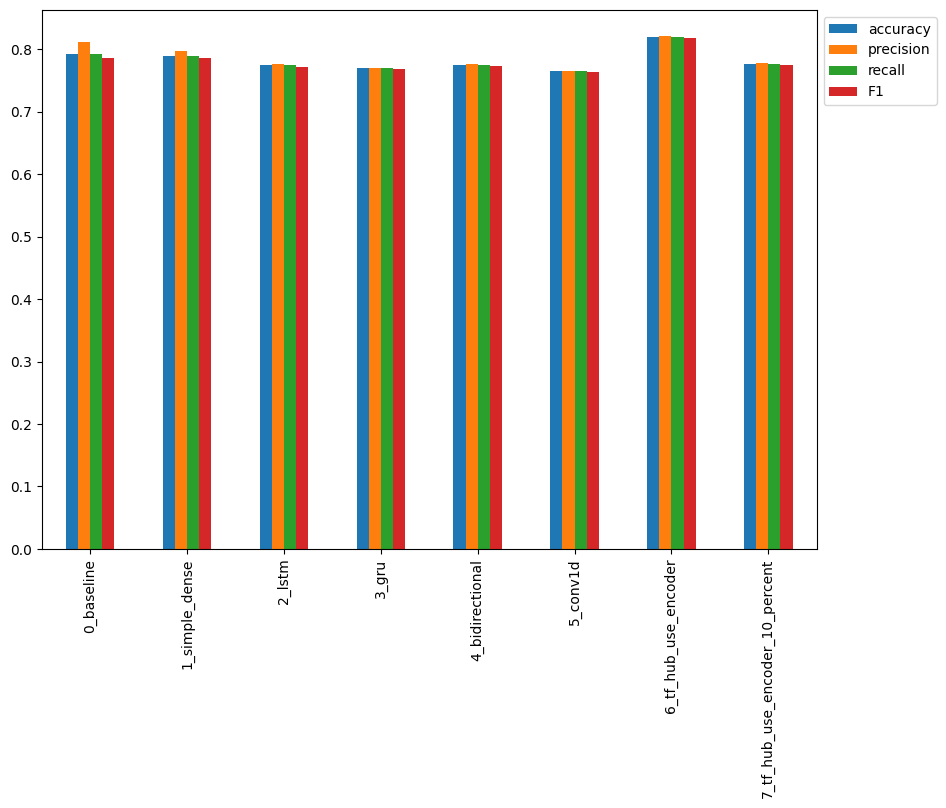

In [108]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

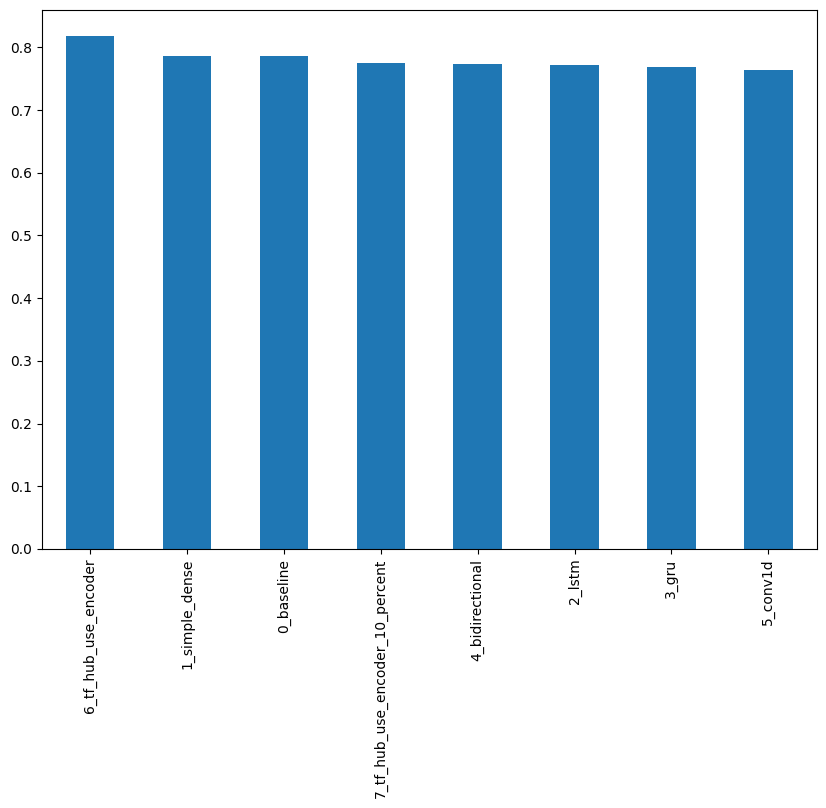

In [109]:
# Sort model results by F1-score
all_model_results.sort_values("F1", ascending=False)["F1"].plot(kind="bar", figsize=(10, 7))

## Uploading our model training logs to TensorBoard.dev

We can further inspect our model's performance using TensorBoard.dev

In [111]:
# # View TensorBoard logs of transfer learning modelling experiments (plus all our models)
# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs/ \
#   --name "NLP Modelling Experiments" \
#   --description "Comparing multiple different types of model architetctures on Kaggle Tweets text classification dataset" \
#   --one_shot # Exit the uploader once uploading is finished

Now I've ran the cell above, my modelling experiments are visible on TensorBoard.dev: https://tensorboard.dev/experiment/xgZnn12JRfepf5IVME1sPg/

In [112]:
!tensorboard dev list

2023-08-14 17:42:43.401404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/xgZnn12JRfepf5IVME1sPg/
	Name                 NLP Modelling Experiments
	Description          Comparing multiple different types of model architetctures on Kaggle Tweets text classification dataset
	Id                   xgZnn12JRfepf5IVME1sPg
	Created              2023-08-14 17:36:57 (5 minutes ago)
	Updated              2023-08-14 17:37:06 (5 minutes ago)
	Runs                 14
	Tags                 5
	Scalars              216
	Tensor bytes         0
	Binary object bytes  2979651
https://tensorboard.dev/experiment/MpJSXDuWQkqD7a1bluQA1g/
	Name                 Transfer Learning Experiments with 10 Food101 Classes
	Description          A Series of different transfer learning experiments with varying amounts of data and fine tunining
	Id                   MpJSXDuWQkqD7a1bluQA1g
	Created              2023-05-16 17:49:09
	Updated  